## Problem:
Build a recommender system by using cosine simillarties score.


## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances


In [2]:
%matplotlib notebook

## Load data:

In [3]:
book_df = pd.read_csv('book.csv', encoding='latin-1')

In [4]:
book_df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
book_df.drop('Unnamed: 0', axis=1, inplace=True) # Drop unnecessary column "Unnamed: 0"

## Data understanding

In [6]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [7]:
print("No of unique User ID's  : ", book_df['User.ID'].nunique())
print("No of unique book titles: ", book_df['Book.Title'].nunique())

No of unique User ID's  :  2182
No of unique book titles:  9659


### Observations:
- The data set contains information about books purcahased by cuastomers and the ratings assigned by them, probably taken from an e-commerce website like amazon.
- There are 10000 records and three features. All of them are recorded with correct datatypes.
- There are no null values.

## UBCF - User based collaborative filtering.

In [8]:
## pivot table with User ID's as features and book titles as target. To make it convenient to make correlations.
book_pvt = pd.pivot_table(data=book_df, values='Book.Rating', index='User.ID', columns='Book.Title').fillna(0)
book_pvt.index = book_df['User.ID'].unique() # To get the right indices.

In [9]:
book_pvt.head()

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Use cosine as a metric for UBCF.
ubcf_book = 1 - pairwise_distances(X=book_pvt.values, metric='cosine')
ubcf_book = pd.DataFrame(data=ubcf_book)
ubcf_book.index = book_df['User.ID'].unique()
ubcf_book.columns = book_df['User.ID'].unique()

In [11]:
ubcf_book.iloc[0:5, 0:5] # View a sample of the computed similarity scores.

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>


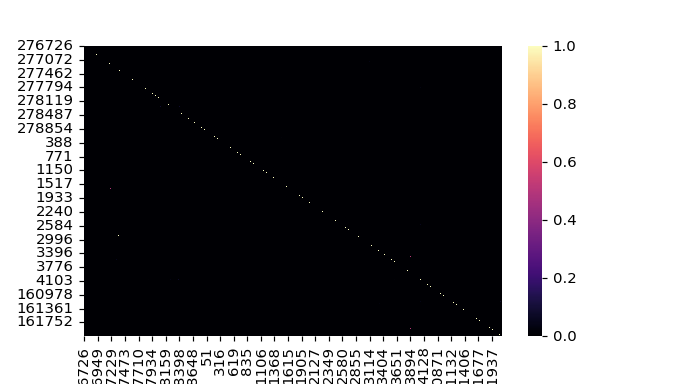

In [12]:
# Visualize the similarity scores using heatmap.
fig, ax = plt.subplots()
ax = sns.heatmap(ubcf_book, cmap='magma')

In [13]:
# Extracting the list of most Similar Users
ubcf_book_sim = pd.DataFrame(ubcf_book.idxmax(axis=1)).reset_index()
ubcf_book_sim.columns = ['user_id1', 'user_id2']
sim_users = ubcf_book_sim[ubcf_book_sim['user_id1']!=ubcf_book_sim['user_id2']]


In [14]:
sim_users

,user_id1,user_id2
427,278160,277945
1101,1782,1775
1235,2203,367
1426,2883,277351
1528,3293,277601
1545,3350,277353
1625,3619,1775
1722,3944,92
1976,161361,161343
1985,161390,278620


### Observations:
- For the dataset provided, we can hardly make out any similarities between preferences of any two customers. There seems to be no common preferences at all between the majority except a few users. This may not be the case in other datasets.
- The users with similar interests are only a few and they are listed above. Despite this we can prepare a list of books which could be recommended to either of the users in a given pair.

In [15]:
# Extracting a list of books that interests either of the users.
common_items = (book_df[(book_df['User.ID']==2203) | (book_df['User.ID']==367)])
common_items

,User.ID,Book.Title,Book.Rating
2764,367,Diary of a Mad Bride (Summer Display Opportunity),9
5108,2203,One Hit Wonderland,7
5109,2203,Grift Sense (Tony Valentine Novels),6


In [16]:
# A function to merge the preferences of both the users.
def match_maker(user_1, user_2):
    user_1_df = book_df[book_df['User.ID']==user_1]
    user_2_df = book_df[book_df['User.ID']==user_2]
    recos_2_users = pd.merge(user_1_df,user_2_df,on='Book.Title',how='outer')
    return recos_2_users
    

In [17]:
# Dictionary to store the preferences of different pairs of users.
users_key = sim_users.index
similar_users = dict.fromkeys(users_key)

num_rows = sim_users.shape[0]
for i in range(num_rows):
    user_id1 = sim_users.values[i][0]
    user_id2 = sim_users.values[i][1]
    similar_users[users_key[i]] = match_maker(user_id1, user_id2)

In [18]:
# Extracting the row index of similar users table to make it 
# convenient to display the preferences of each pair from the dictionary.
similar_users.keys()

dict_keys([427, 1101, 1235, 1426, 1528, 1545, 1625, 1722, 1976, 1985, 2001])

In [19]:
similar_users[427] # Preferences of the users 278160 and 277945.

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,278160.0,Siva,8.0,NaN,NaN
1,NaN,Shopaholic Takes Manhattan (Summer Display Opp...,NaN,277945.0,6.0
2,NaN,Confessions of a Shopaholic (Summer Display Op...,NaN,277945.0,8.0
3,NaN,The Cider House Rules,NaN,277945.0,6.0
4,NaN,PRIME TIME : PRIME TIME,NaN,277945.0,7.0
5,NaN,Uncle Tungsten: Memories of a Chemical Boyhood,NaN,277945.0,2.0
6,NaN,Family At Last (Love Inspired (Numbered)),NaN,277945.0,7.0
7,NaN,Sons of Texas : Callaway Country,NaN,277945.0,8.0
8,NaN,Nickel and Dimed: On (Not) Getting By in America,NaN,277945.0,7.0
9,NaN,Gingerbread,NaN,277945.0,7.0


## Conclusion
Thus, we can access the common preferences of ay pair of users from the list of similar users derived using similarty scores.